# Bank Churners Explainable Machine Learning LIME

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df = pd.read_csv("data\BankChurners.csv")

In [3]:
len(df.columns)

23

## 1. Preprocessing

In [4]:
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(df.columns[20:22], axis=1, inplace=True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
df.describe(include=[object])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [6]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [9]:
# Set the Attrition flag to target to 1 and 0
df.loc[df['Attrition_Flag'] == "Existing Customer",["Attrition_Flag"]] = 0
df.loc[df['Attrition_Flag'] == "Attrited Customer",["Attrition_Flag"]] = 1

df[["Attrition_Flag"]] = df[["Attrition_Flag"]].astype(int)

## 2. Modelling

* Decision Tree Classifier
* Random Forest Classifier
* XGBoost Classifier
* Hyperparameter tuning with GridSearchCV

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
# Use StandardScaler for normalization
from sklearn.preprocessing import StandardScaler

In [12]:
def oversample(X_train, y_train):
        oversample = RandomOverSampler(sampling_strategy='all')
        # Convert to numpy and oversample
        x_np = X_train.to_numpy()
        y_np = y_train.to_numpy()
        x_np, y_np = oversample.fit_resample(x_np, y_np)
        # Convert back to pandas
        x_over = pd.DataFrame(x_np, columns=X_train.columns)
        y_over = pd.Series(y_np, name=y_train.name)
        return x_over, y_over

In [13]:
np.random.seed(42)

X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]
X = pd.get_dummies(X, drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Oversample the train data
X_train, y_train = oversample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)

(13602, 32)
(2026, 32)


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    '''''
    Performs evaluation comparison on y_true labels vs. y_pred labels on a classification
    '''''
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy,2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [15]:

np.random.seed(42)

X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]
X = pd.get_dummies(X, drop_first = True)


### 2.1 Decision Tree Classifier

In [16]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, y_train = oversample(X_train, y_train)

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtc.predict(X_test)
dtc_metrics = evaluate_preds(y_test, y_pred)

Acc: 93.83%
Precision: 0.81
Recall: 0.81
F1 score: 0.81


In [17]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1636,   63],
       [  62,  265]], dtype=int64)

<AxesSubplot:>

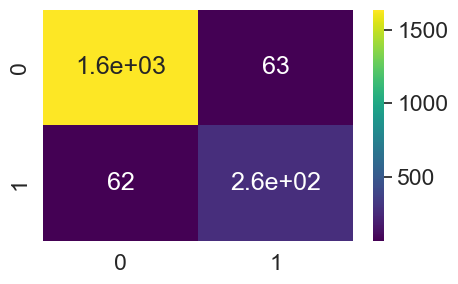

In [18]:
# Plot Confusion Matrix
rcParams['figure.figsize'] = 5,3
sns.set(font_scale = 1.5)
conf_mat = confusion_matrix(y_test, y_pred )
sns.heatmap(conf_mat, annot=True, cmap='viridis')

### 2.2 Random Forest Classifier

In [19]:


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rfc_metrics = evaluate_preds(y_test, y_pred)

Acc: 95.66%
Precision: 0.89
Recall: 0.83
F1 score: 0.86


In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1666,   33],
       [  55,  272]], dtype=int64)

<AxesSubplot:>

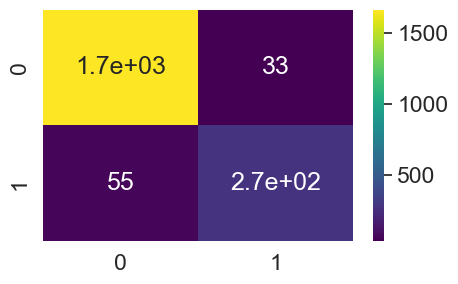

In [21]:
# Plot Confusion Matrix
rcParams['figure.figsize'] = 5,3
sns.set(font_scale = 1.5)
conf_mat = confusion_matrix(y_test, y_pred )
sns.heatmap(conf_mat, annot=True, cmap='viridis')

### 2.3 XGBoost Classifier

In [23]:
from xgboost import XGBClassifier


xgb = XGBClassifier()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
xgb_metrics = evaluate_preds(y_test, y_pred)

Acc: 96.64%
Precision: 0.88
Recall: 0.91
F1 score: 0.90


In [24]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1659,   40],
       [  28,  299]], dtype=int64)

<AxesSubplot:>

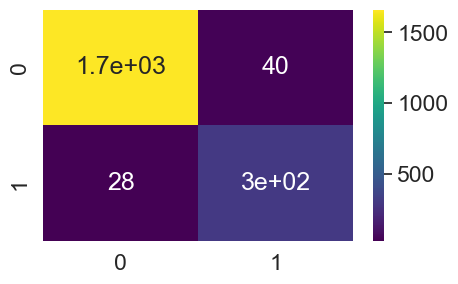

In [25]:
# Plot Confusion Matrix
rcParams['figure.figsize'] = 5,3
sns.set(font_scale = 1.5)
conf_mat = confusion_matrix(y_test, y_pred )
sns.heatmap(conf_mat, annot=True, cmap='viridis')

### 2.4 Hyperparameter tuning with GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[150,300,450],
         'learning_rate':[0.01,0.1,1],
         'max_depth':[1,2,3,4,5]}
grid = GridSearchCV(xgb, param_grid = params, cv = 5, n_jobs = -1)
grid.fit(X_train,y_train);

In [27]:
grid.best_params_, grid.best_score_

({'learning_rate': 1, 'max_depth': 5, 'n_estimators': 150}, 0.991104292323324)

In [28]:
y_pred = grid.predict(X_test)
grid_metrics = evaluate_preds(y_test, y_pred)

Acc: 96.30%
Precision: 0.88
Recall: 0.89
F1 score: 0.89


<AxesSubplot:>

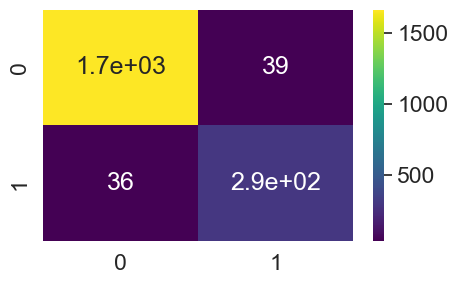

In [29]:
# Plot Confusion Matrix
rcParams['figure.figsize'] = 5,3
sns.set(font_scale = 1.5)
conf_mat = confusion_matrix(y_test, y_pred )
sns.heatmap(conf_mat, annot=True, cmap='viridis')

<AxesSubplot:>

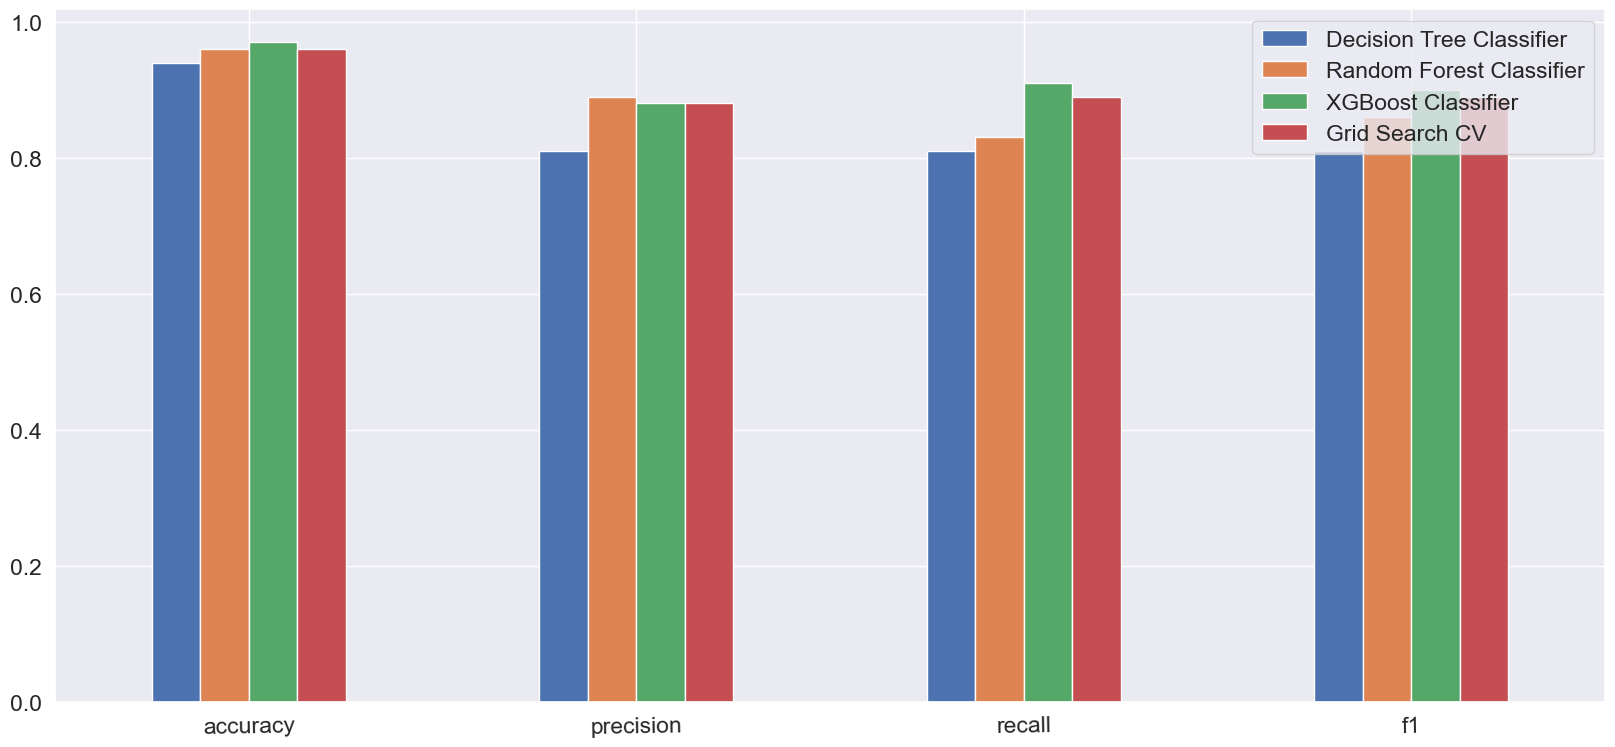

In [35]:
compare_metrics = pd.DataFrame({"Decision Tree Classifier" : dtc_metrics,
                              "Random Forest Classifier":rfc_metrics,
                              "XGBoost Classifier": xgb_metrics,
                              "Grid Search CV": grid_metrics})
compare_metrics.plot.bar(figsize = (20,9),rot = 1)

## 3. LIME visualization

In [36]:
from interpret.blackbox import LimeTabular


# %% Apply lime
# Initilize Lime for Tabular data
lime = LimeTabular(xgb.fit(X_train,y_train), 
                   data=X_train, 
                   random_state=1)

In [37]:
from interpret import show

# Get local explanations
lime_local = lime.explain_local(X_test[-40:], 
                                y_test[-40:], 
                                name='LIME')

show(lime_local)

<!-- http://127.0.0.1:7001/1593978525392/ -->